In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
from ast import literal_eval

In [2]:
# df = pd.read_csv('C:\\Users//odesa/\OneDrive - University of Toronto\\CRC\\maaslin\\DRA008156\\2_groups\\clustered_NoNorm\\all_results.tsv', sep='\t')

df = pd.read_csv('/home/oliver/CRConedriveData/maaslin/DRA008156/2_groups/clustered_NoNorm/all_results.tsv', sep='\t') # for linux

**DRA008156**

In [ ]:
df = scale_values(df)

create_heatmap(df, 'DLE Clusters vs. All Features', '../../figures/heatmap_8156_test.png', 'Cancer')

In [ ]:
dl_df = df.loc[df['feature'].str.contains('DL.e')]

dl_df_scaled = scale_values(dl_df)

create_heatmap(dl_df_scaled, 'DLE Clusters vs. All Features', '../../figures/DL_heatmap_8156_new.png', 'Cancer')

In [ ]:
ldcarb_df = df.loc[df['feature'].str.contains('LD.carb')]

ldcarb_df_scaled = scale_values(ldcarb_df)

create_heatmap(ldcarb_df_scaled, 'DLE Clusters vs. All Features', '../../figures/LDcarb_heatmap_8156_new.png', 'Cancer')

In [ ]:
ddcarb_df = df.loc[df['feature'].str.contains('DD.carb')]

ddcarb_df_scaled = scale_values(ddcarb_df)

create_heatmap(ddcarb_df_scaled, 'DLE Clusters vs. All Features', '../../figures/DDcarb_heatmap_8156_new.png', 'Cancer')

**PRJEB7774**

In [ ]:
df_7774 = pd.read_csv('C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\PRJEB7774\\new_cluster\\no_clr\\all_results.tsv', sep='\t')

print(df_7774.head())

In [ ]:
dl_df = df_7774.loc[df_7774['feature'].str.contains('DL.e')]

dl_df_scaled = scale_values(dl_df)

create_heatmap(dl_df_scaled, 'DLE Associations in CRC and Adenoma vs. Healthy', '../../figures/DL_heatmap_7774_new.png', 'Carcinoma')

In [ ]:
df_7774 = pd.read_csv('C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\PRJEB7774\\new_cluster\\clr\\all_results.tsv', sep='\t')

print(df_7774.head())

In [ ]:
dl_df = df_7774.loc[df_7774['feature'].str.contains('DL.e')]

dl_df_scaled = scale_values(dl_df)

create_heatmap(dl_df_scaled, 'DLE Associations in CRC and Adenoma vs. Healthy', '../../figures/DL_heatmap_7774_new_clr.png', 'Carcinoma')

**Plotting Bariatric Data**

In [2]:
bariatric = pd.read_csv('E:/bariatric/grouped_bariatric.tsv', sep='\t')

bariatric_metadata = pd.read_csv('E:/bariatric/bariatric_metadata.tsv', sep='\t')

In [3]:
bariatric_metadata['unique_id'] = bariatric_metadata['sample_id'] + '_' + bariatric_metadata['TimePoint']

In [4]:
bariatric['unique_id'] = bariatric_metadata['unique_id']

In [5]:
merged_bariatric = pd.merge(bariatric, bariatric_metadata, on='unique_id')

In [2]:
merged_bariatric = pd.read_csv('/media/oliver/PGH_Backup/bariatric/merged_bariatric.tsv', sep='\t')

In [ ]:
merged_bariatric.head()

In [6]:
# Filter the DataFrame for the DL-endopeptidase enzyme and relevant metadata
df_filtered = merged_bariatric[['sample_id_x', 'TimePoint', 'DL-endopeptidase']].copy()

# Pivot the DataFrame to have one row per patient (sample_id_x) and one column for each TimePoint
df_pivot = df_filtered.pivot(index='sample_id_x', columns='TimePoint', values='DL-endopeptidase')

# Drop any rows with NaN values, which occur if a patient doesn't have all timepoints
df_pivot = df_pivot.dropna()


In [7]:
# Perform the Friedman test
# The Friedman test requires data to be in the form of a 2D array where each row is a block (patient) and each column is a condition (timepoint)
friedman_result = friedmanchisquare(*[df_pivot[col] for col in df_pivot.columns])

print(f"Friedman test statistic: {friedman_result.statistic}, p-value: {friedman_result.pvalue}")

Friedman test statistic: 26.72727272727269, p-value: 6.715617022033378e-06


In [ ]:
# Perform post-hoc analysis if the Friedman test is significant
if friedman_result.pvalue < 0.05:
    # Prepare data for post-hoc analysis
    # Reset index to use in post-hoc analysis
    df_posthoc = df_filtered.dropna().reset_index(drop=True)
    
    # Conduct post-hoc analysis using Conover's test
    post_hoc_results = sp.posthoc_conover(df_posthoc, val_col='DL-endopeptidase', group_col='TimePoint', p_adjust='holm')
    
    print("Post-hoc Conover test results:")
    print(post_hoc_results)
else:
    print("No significant differences found, post-hoc analysis not required.")

In [9]:
# Filter the DataFrame for the DL-endopeptidase enzyme and relevant metadata
df_filtered = merged_bariatric[['sample_id_x', 'TimePoint', 'LD-carboxypeptidase']].copy()

# Pivot the DataFrame to have one row per patient (sample_id_x) and one column for each TimePoint
df_pivot = df_filtered.pivot(index='sample_id_x', columns='TimePoint', values='LD-carboxypeptidase')

# Drop any rows with NaN values, which occur if a patient doesn't have all timepoints
df_pivot = df_pivot.dropna()

In [ ]:
# Perform the Friedman test
# The Friedman test requires data to be in the form of a 2D array where each row is a block (patient) and each column is a condition (timepoint)
friedman_result = friedmanchisquare(*[df_pivot[col] for col in df_pivot.columns])

print(f"Friedman test statistic: {friedman_result.statistic}, p-value: {friedman_result.pvalue}")

# Perform post-hoc analysis if the Friedman test is significant
if friedman_result.pvalue < 0.05:
    # Prepare data for post-hoc analysis
    # Reset index to use in post-hoc analysis
    df_posthoc = df_filtered.dropna().reset_index(drop=True)
    
    # Conduct post-hoc analysis using Conover's test
    post_hoc_results = sp.posthoc_conover(df_posthoc, val_col='LD-carboxypeptidase', group_col='TimePoint', p_adjust='holm')
    
    print("Post-hoc Conover test results:")
    print(post_hoc_results)
else:
    print("No significant differences found, post-hoc analysis not required.")

In [ ]:

enzymes = ['DL-endopeptidase', 'LD-carboxypeptidase', 
           'LD-endopeptidase', 'Glucosaminidase',
           'DD-carboxypeptidase', 'Diadenylate',
           'Amidase', 'Muramidase']

order = ['BL', 'OR', '1M', '6M']  # Define the desired order of the x-axis

for enzyme in enzymes:    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=merged_bariatric, x='TimePoint', y=enzyme, showfliers=False, order=order)
    sns.stripplot(data=merged_bariatric, x='TimePoint', y=enzyme, color='black', alpha=0.5, order=order)

    plt.title(f'Relative Abundances of {enzyme} at Each Timepoint')
    plt.xlabel('Timepoint')
    plt.ylabel('Relative Abundance')
    plt.xticks(rotation=45)  # Ensure timepoint labels are not overlapping
    plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
    plt.show()

**Plotting Clustered ICI Data**

In [21]:
ici = pd.read_csv('/media/oliver/PGH_Backup/ICI/maaslin/PRJNA399742/Maaslin2ResultsNoNorm/all_results.tsv', sep='\t')

In [ ]:
dl_df = ici.loc[ici['feature'].str.contains('DL.e')]

dl_df_scaled = scale_values(dl_df)

create_heatmap(dl_df_scaled, 'DLE Associations in Responders vs Non-responders in ICI', '../../figures/DL_heatmap_ici_399742.png', 'R')

**PRJEB10878 Data with updated clusters**

In [ ]:
prjeb10878 = pd.read_csv('E:/CRC/PRJEB10878/maaslin/no_clr/all_results.tsv', sep='\t')
print(prjeb10878.head())

In [ ]:
dl_df = prjeb10878.loc[prjeb10878['feature'].str.contains('DL.e')]

dl_df_scaled = scale_values(dl_df)

create_heatmap(dl_df_scaled, 'DLE Associations in CRC vs healthy patients', '../../figures/DL_heatmap_updated_10878.png', 'case')

**Visualizations of domains and secretion across downregulated clusters**

In [2]:
cluster_info = pd.read_csv('plotting_script/data/cluster_info.tsv', sep='\t')

protein_info = pd.read_csv('plotting_script/data/merged_info.tsv', sep='\t')

# display(cluster_info.head())
display(protein_info.head())

,# ID,Genome,Prediction,Uniref,Lineage,Interpro,dl_endopeptidase-foldseek_cluster
0,MGYG000155050_27_22,MGYG000155050,OTHER,A0A3S5AQD8,d__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;...,"['Endopeptidase, NLPC/P60 domain']",A0A1C5WD06
1,MGYG000096674_74_7,MGYG000096674,OTHER,A0A1C6G2Q5,d__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;...,"['Endopeptidase, NLPC/P60 domain']",A0A1C5WD06
2,MGYG000074457_25_259,MGYG000074457,SP,A0A3P1BK63,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,"['Endopeptidase, NLPC/P60 domain', 'SH3-like d...",A0A1V6BVN9
3,MGYG000074457_44_345,MGYG000074457,SP,A0A2S9XVU2,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,"['Endopeptidase, NLPC/P60 domain', 'Bacterial ...",A0A1V5YPB2
4,MGYG000002288_3_33,MGYG000002288,SP,A0A3P1BK63,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,"['Endopeptidase, NLPC/P60 domain', 'SH3-like d...",A0A1V6BVN9


In [ ]:
downregulated = ['A0A0B0HUJ2', 'A0A1C5VJV2', 'A0A1C6FAW9', 'A0A1C6G745', 'A0A1Y6AQ80',
                  'A0A6N3BHG0', 'A0A174TDS3', 'A0A829ZMP2', 'R6MIH8', 'R6YTV6']

subset_df = protein_info[protein_info['dl_endopeptidase-foldseek_cluster'].isin(downregulated)]

# print(subset_df['Interpro'])

subset_df['Interpro'] = subset_df['Interpro'].fillna('[]')

# Convert the 'Interpro' column strings to actual lists if they are string representations
subset_df['Interpro'] = subset_df['Interpro'].apply(literal_eval)

# Explode the 'Interpro' lists to rows
exploded_df = subset_df.explode('Interpro')

# print(exploded_df['Interpro'].value_counts())

domain_counts = exploded_df.groupby(['dl_endopeptidase-foldseek_cluster', 'Interpro']).size()

# print(domain_counts)





In [ ]:
# First, get total counts per cluster to calculate proportions
total_counts_per_cluster = subset_df.groupby('dl_endopeptidase-foldseek_cluster').size()



In [ ]:
# Convert domain_counts to a DataFrame
domain_counts_df = domain_counts.reset_index(name='count')

# Merge domain_counts with total_counts_per_cluster to align total counts with each domain count
domain_counts_df = domain_counts_df.merge(total_counts_per_cluster.rename('total_count'), on='dl_endopeptidase-foldseek_cluster')

# Calculate the proportion for each domain within its cluster
domain_counts_df['proportion'] = domain_counts_df['count'] / domain_counts_df['total_count']

# Set the index back to [cluster, domain] if needed
domain_counts_df.set_index(['dl_endopeptidase-foldseek_cluster', 'Interpro'], inplace=True)

display(domain_counts_df)

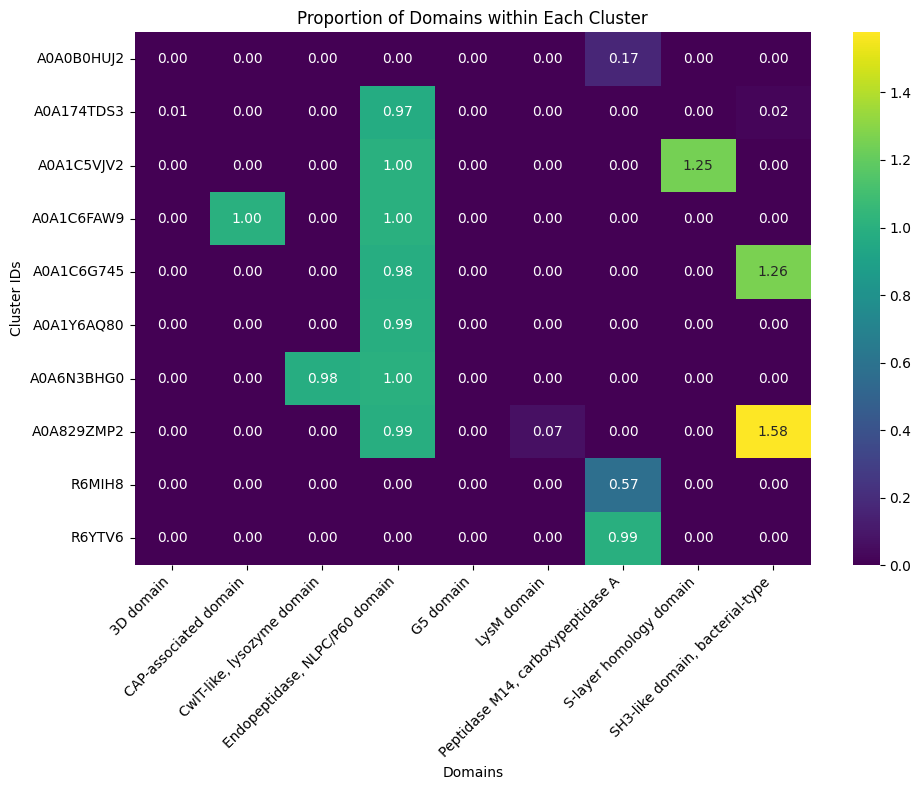

In [19]:
# Pivot the DataFrame to create a matrix suitable for a heatmap
heatmap_data = domain_counts_df.pivot_table(index='dl_endopeptidase-foldseek_cluster', columns='Interpro', values='proportion', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 8))  # You might need to adjust the size based on your actual data
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f")
plt.title('Proportion of Domains within Each Cluster')
plt.xlabel('Domains')
plt.ylabel('Cluster IDs')
plt.xticks(rotation=45, ha='right')  # Rotate domain names for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

In [25]:
preferred_order = ['Endopeptidase, NLPC/P60 domain', 'SH3-like domain, bacterial-type', 'Peptidase M14, carboxypeptidase A', 'S-layer homology domain', 'CAP-associated domain', 'CwlT-like, lysozyme domain', 'LysM domain']

# Ensure all preferred order items are in the DataFrame columns and filter out any that are not
filtered_order = [domain for domain in preferred_order if domain in heatmap_data.columns]
# Reorder the DataFrame columns
ordered_heatmap_data = heatmap_data[filtered_order]

# Step 3: Create the heatmap with the reordered DataFrame
plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.heatmap(ordered_heatmap_data, cmap='inferno', annot=True, fmt=".2f")
plt.title('Proportion of Domains within Each Cluster')
plt.xlabel('Domains')
plt.ylabel('Cluster IDs')
plt.xticks(rotation=45, ha='right')  # Rotate domain names for readability
plt.tight_layout()  # Adjust layout to not cut off labels

plt.savefig('C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\figures\\domain_heatmap.png', dpi=600)  # Specify your desired path and file name here

plt.close()

In [3]:
downregulated = ['A0A0B0HUJ2', 'A0A1C5VJV2', 'A0A1C6FAW9', 'A0A1C6G745', 'A0A1Y6AQ80',
                  'A0A6N3BHG0', 'A0A174TDS3', 'A0A829ZMP2', 'R6MIH8', 'R6YTV6']

subset_df = protein_info[protein_info['dl_endopeptidase-foldseek_cluster'].isin(downregulated)]

taxa = subset_df.groupby(['dl_endopeptidase-foldseek_cluster', 'Lineage']).size()

display(taxa)



dl_endopeptidase-foldseek_cluster  Lineage                                                                                                                           
A0A0B0HUJ2                         d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Eubacteriales;f__Garciellaceae;g__Garciella;s__Garciella sp900555725                       1
                                   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__Ruminococcus_E;s__Ruminococcus_E sp003526955      1
                                   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__TANB77;f__CAG-508;g__CAG-269;s__CAG-269 sp000431335                                      259
                                   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__TANB77;f__CAG-508;g__CAG-269;s__CAG-269 sp001916055                                       51
                                   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__TANB77;f__CAG-508;g__CAG-492;s__CAG-492 sp000434015           

In [4]:
taxa = taxa.reset_index(name='Count')


# Extracting Phylum, Family, and Genus
taxa['Phylum'] = taxa['Lineage'].apply(lambda x: x.split(';')[1].split('__')[-1])
taxa['Family'] = taxa['Lineage'].apply(lambda x: x.split(';')[4].split('__')[-1])
taxa['Genus'] = taxa['Lineage'].apply(lambda x: x.split(';')[5].split('__')[-1])

# The 'grouped' DataFrame should now correctly reflect counts, so the following should work without KeyError:
phylum_agg = taxa.groupby(['dl_endopeptidase-foldseek_cluster', 'Phylum']).agg({'Count': 'sum'}).reset_index()
family_agg = taxa.groupby(['dl_endopeptidase-foldseek_cluster', 'Family']).agg({'Count': 'sum'}).reset_index()
genus_agg = taxa.groupby(['dl_endopeptidase-foldseek_cluster', 'Genus']).agg({'Count': 'sum'}).reset_index()

def calculate_proportions(sub_df):
    total_count = sub_df['Count'].sum()
    sub_df['Proportion'] = sub_df['Count'] / total_count
    return sub_df

# Calculate proportions
phylum_agg = phylum_agg.groupby('dl_endopeptidase-foldseek_cluster').apply(calculate_proportions)
family_agg = family_agg.groupby('dl_endopeptidase-foldseek_cluster').apply(calculate_proportions)
genus_agg = genus_agg.groupby('dl_endopeptidase-foldseek_cluster').apply(calculate_proportions)

phylum_agg['Phylum'] = phylum_agg['Phylum'].str.replace('^Firmicutes.*', 'Firmicutes', regex=True)




In [7]:

# # Calculate proportions
# phylum_agg = phylum_agg.groupby('dl_endopeptidase-foldseek_cluster').apply(calculate_proportions)
# family_agg = family_agg.groupby('dl_endopeptidase-foldseek_cluster').apply(calculate_proportions)
# genus_agg = genus_agg.groupby('dl_endopeptidase-foldseek_cluster').apply(calculate_proportions)

# # Plotting
clusters = subset_df['dl_endopeptidase-foldseek_cluster'].unique()
# fig, ax = plt.subplots(figsize=(10, 6))

# bar_width = 0.25
# index = pd.Index(range(len(clusters)))

# for i, cluster in enumerate(clusters):
#     phylum_proportion = phylum_agg[phylum_agg['dl_endopeptidase-foldseek_cluster'] == cluster]['Proportion'].sum()
#     family_proportion = family_agg[family_agg['dl_endopeptidase-foldseek_cluster'] == cluster]['Proportion'].sum()
#     genus_proportion = genus_agg[genus_agg['dl_endopeptidase-foldseek_cluster'] == cluster]['Proportion'].sum()
    
#     plt.bar(index[i] - bar_width, phylum_proportion, bar_width, label='Phylum' if i == 0 else "", color='r')
#     plt.bar(index[i], family_proportion, bar_width, label='Family' if i == 0 else "", color='g')
#     plt.bar(index[i] + bar_width, genus_proportion, bar_width, label='Genus' if i == 0 else "", color='b')

# ax.set_xlabel('Cluster')
# ax.set_ylabel('Proportion')
# ax.set_title('Proportion of Taxa within Each Cluster')
# ax.set_xticks(index)
# ax.set_xticklabels(clusters, rotation=45)
# ax.legend()

# plt.tight_layout()
# plt.show()


In [10]:
def plot_taxonomic_rank_proportions(agg_df, taxonomic_rank, clusters):
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.7
    index = range(len(clusters))

    # Map each unique taxonomic group to a color
    unique_taxa = agg_df[taxonomic_rank].unique()
    colors = plt.cm.tab20(range(len(unique_taxa)))
    color_map = dict(zip(unique_taxa, colors))

    for i, cluster in enumerate(clusters):
        cluster_data = agg_df[agg_df['dl_endopeptidase-foldseek_cluster'] == cluster]
        bottom = 0
        for _, row in cluster_data.iterrows():
            plt.bar(i, row['Proportion'], bottom=bottom, color=color_map[row[taxonomic_rank]], edgecolor='white', width=bar_width)
            bottom += row['Proportion']

    ax.set_xlabel('Cluster')
    ax.set_ylabel('Proportion')
    ax.set_title(f'Proportion of {taxonomic_rank} within Each Cluster')
    ax.set_xticks(index)
    ax.set_xticklabels(clusters, rotation=45)

    # Create a legend for the taxonomic groups
    patches = [plt.Rectangle((0,0),1,1, color=color_map[taxa]) for taxa in unique_taxa]
    plt.legend(patches, unique_taxa, bbox_to_anchor=(1.05, 1), loc='upper left', title=taxonomic_rank)

    plt.tight_layout()
    # plt.savefig(f'C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\figures\\{taxonomic_rank}_proportions.png', dpi=600)
    plt.show()
# Example usage for Phylum-level plot
# plot_taxonomic_rank_proportions(phylum_agg, 'Phylum', clusters)

# Repeat the process for family_agg and genus_agg to create the Family-level and Genus-level plots.


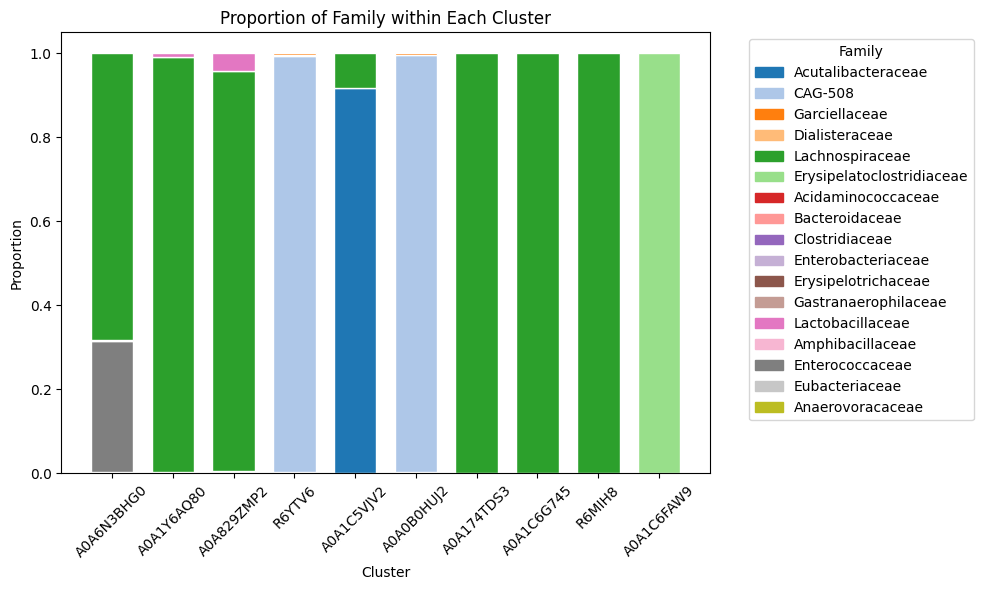

In [11]:
plot_taxonomic_rank_proportions(family_agg, 'Family', clusters)

C:\Users\odesa\AppData\Local\Temp\ipykernel_14800\965996172.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


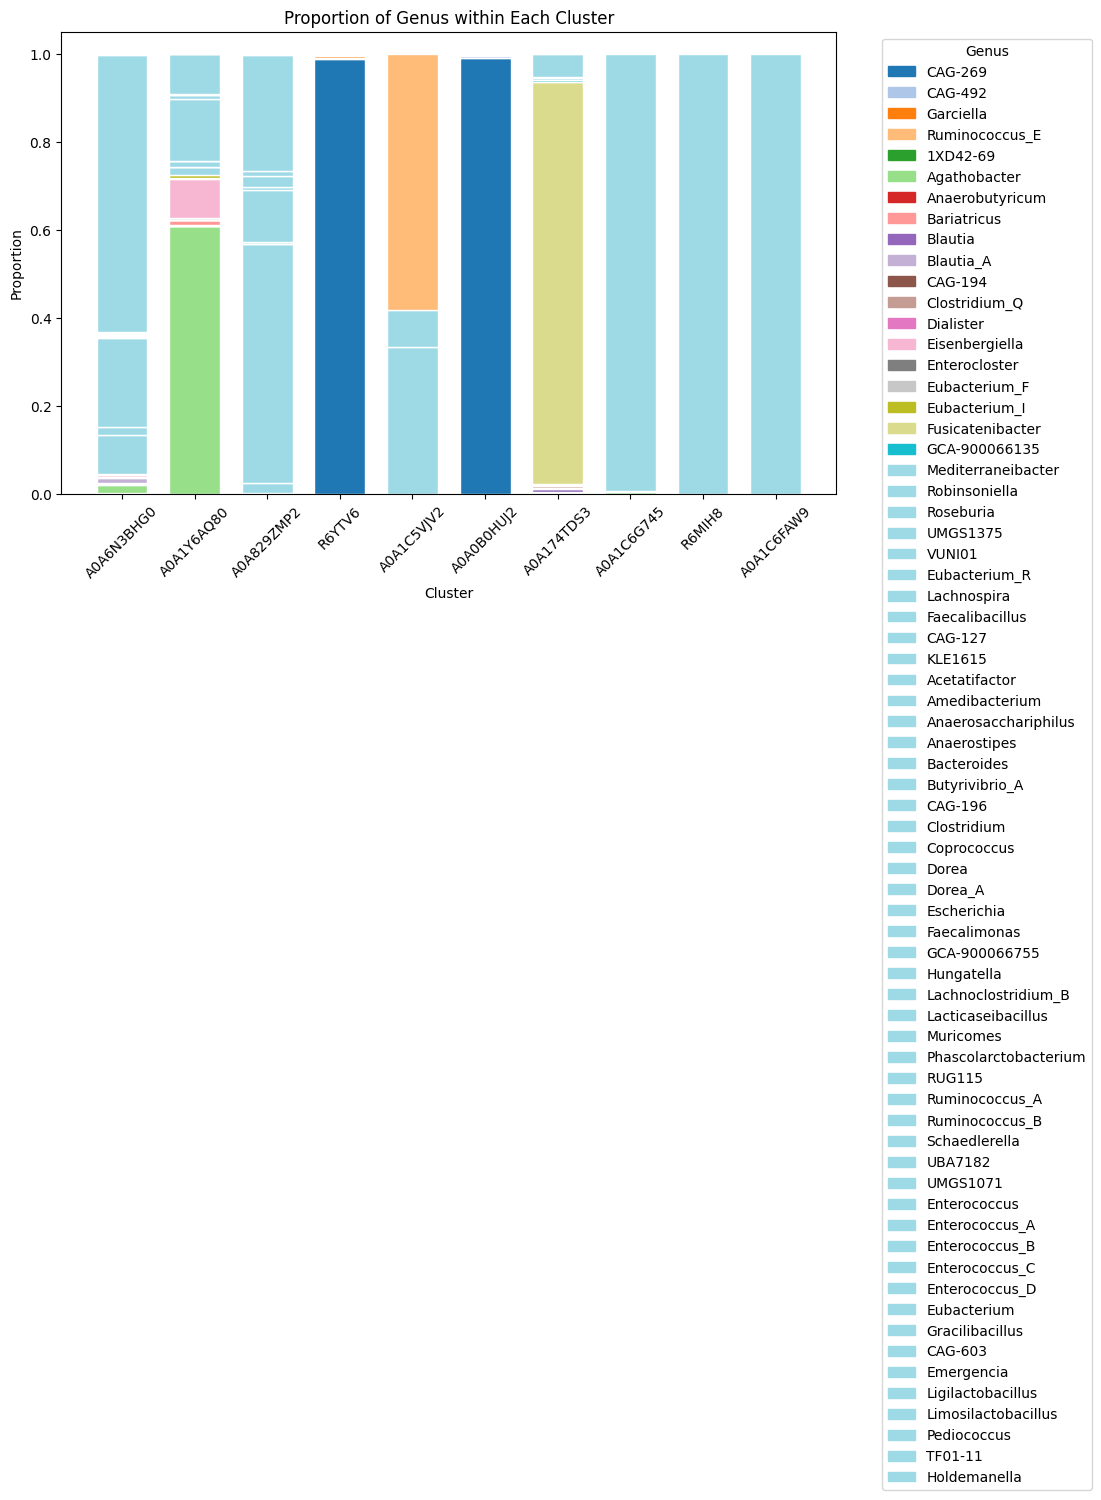

In [34]:
plot_taxonomic_rank_proportions(genus_agg, 'Genus', clusters)

In [12]:
# Check if 'dl_endopeptidase-foldseek_cluster' is in the index
if 'dl_endopeptidase-foldseek_cluster' in genus_agg.index.names:
    # If it's in the index, drop it from the index to avoid duplication
    genus_agg_reset = genus_agg.reset_index(drop=True)
else:
    # If it's not in the index, just proceed as it is
    genus_agg_reset = genus_agg

print (genus_agg_reset)



    dl_endopeptidase-foldseek_cluster           Genus  Count  Proportion
0                          A0A0B0HUJ2         CAG-269    310    0.990415
1                          A0A0B0HUJ2         CAG-492      1    0.003195
2                          A0A0B0HUJ2       Garciella      1    0.003195
3                          A0A0B0HUJ2  Ruminococcus_E      1    0.003195
4                          A0A174TDS3        1XD42-69      1    0.000376
..                                ...             ...    ...         ...
113                            R6YTV6         CAG-269    325    0.987842
114                            R6YTV6         CAG-492      1    0.003040
115                            R6YTV6       Garciella      1    0.003040
116                            R6YTV6    Holdemanella      1    0.003040
117                            R6YTV6  Ruminococcus_E      1    0.003040

[118 rows x 4 columns]


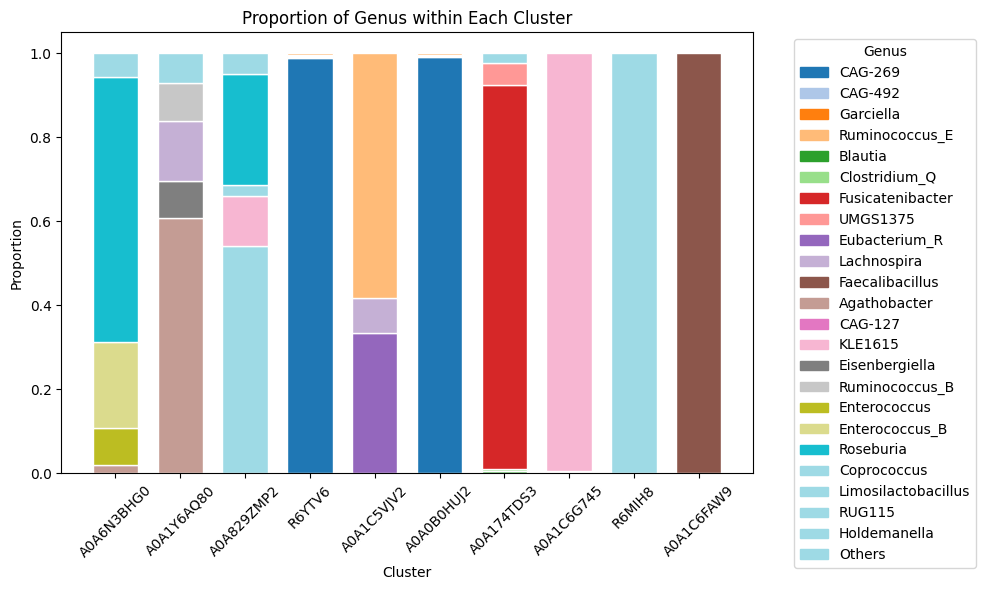

In [79]:
N = 4

# Ensure 'dl_endopeptidase-foldseek_cluster' is unambiguously treated as a column.
# Using `as_index=False` to explicitly keep the groupby keys as columns.
genus_totals = genus_agg_reset.groupby(['dl_endopeptidase-foldseek_cluster', 'Genus'], as_index=False)['Proportion'].sum()

genus_totals['Rank'] = genus_totals.groupby('dl_endopeptidase-foldseek_cluster')['Proportion'].rank("dense", ascending=False)

top_n_genus = genus_totals[genus_totals['Rank'] <= N]
others = genus_totals.loc[genus_totals['Rank'] > N].groupby('dl_endopeptidase-foldseek_cluster', as_index=False).agg({'Proportion': 'sum'})
others['Genus'] = 'Others'
others['Rank'] = N + 1  # Assign a rank that puts "Others" just outside the top N

# Combine the top N with "Others"
adjusted_genus_totals = pd.concat([top_n_genus, others], ignore_index=True)

# Proceed with plotting the adjusted_genus_totals as before

plot_taxonomic_rank_proportions(adjusted_genus_totals, 'Genus', clusters)

**Volcano Plots for clustered DLE change in each of the studies**

In [ ]:
data = pd.read_csv('subset_data.csv')

print(data.head())


In [ ]:
data['neg_log10_p_value'] = -np.log10(data['qval'])

print(data.head())

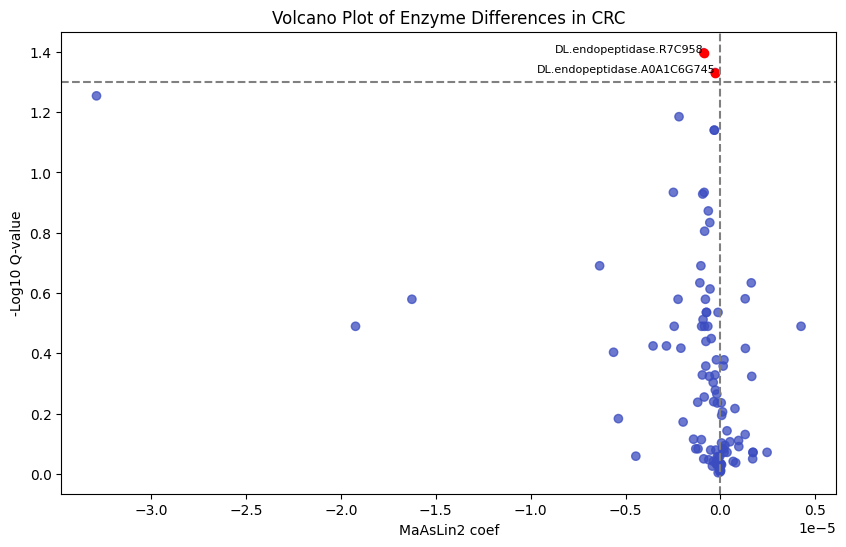

In [18]:
# Plot settings
plt.figure(figsize=(10, 6))
significance_threshold = 0.05  # p-value threshold for significance

# Plotting all points
plt.scatter(data['coef'], data['neg_log10_p_value'], 
            c=(data['qval'] < significance_threshold), cmap='coolwarm', alpha=0.75)

# Highlight significant points
significant = data[data['qval'] < significance_threshold]
plt.scatter(significant['coef'], significant['neg_log10_p_value'], color='red')

# Adding labels to significant points
for i, row in significant.iterrows():
    plt.text(row['coef'], row['neg_log10_p_value'], row['feature'], fontsize=8, ha='right')

# Adding labels, title, and custom lines
plt.title('Volcano Plot of Enzyme Differences in CRC')
plt.xlabel('MaAsLin2 coef')
plt.ylabel('-Log10 Q-value')

plt.axhline(-np.log10(significance_threshold), color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Show the plot
plt.show()

**Combined heatmap for data**

In [ ]:
DRA008156 = pd.read_csv("C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\DRA008156\\new_cluster\\no_clr\\all_results.tsv", sep='\t')

PRJEB7774 = pd.read_csv("C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\PRJEB7774\\new_cluster\\no_clr\\all_results.tsv", sep='\t')

PRJEB10878 = pd.read_csv("C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\PRJEB10878\\new_cluster\\no_clr\\all_results.tsv", sep='\t')

# Concatenate the dataframes
combined_df = pd.concat([DRA008156.assign(study='DRA008156'), 
                         PRJEB7774.assign(study='PRJEB7774'), 
                         PRJEB10878.assign(study='PRJEB10878')])

# Print the combined dataframe
print(combined_df)




In [ ]:
combined_df = combined_df.loc[combined_df['feature'].str.contains('DL.e')]

combined_df['feature'] = combined_df['feature'].str.split('.').str[2]




dl_df_scaled = scale_values(combined_df)

print(dl_df_scaled)



# create_heatmap(dl_df_scaled, 'DLE Clusters vs. All Features', '../../figures/DL_heatmap_8156_new.png', 'Cancer')

In [ ]:
# Rename values in the "value" column of the DataFrame
dl_df_scaled['value'] = dl_df_scaled['value'].replace({'case': 'Carcinoma', 'Cancer': 'Carcinoma'})

# Print the updated DataFrame
print(dl_df_scaled)


In [ ]:
dl_df_scaled = dl_df_scaled[dl_df_scaled['value'] != 'Adenoma']

print(dl_df_scaled)

In [48]:
def create_heatmap(dataframe, title, filename):
    # Pivot the DataFrame for the heatmap
    # Use 'study' as columns, 'feature' as rows, and 'scaled_value' for the heatmap values
    heatmap_data = dataframe.pivot_table(index='feature', columns='study', values='scaled_value', aggfunc='mean')

    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm_r', fmt='.2f', center=0)

    # Customize the plot
    plt.title(title)
    plt.ylabel('DLE Clusters')
    plt.xlabel('Study ID')

    # Save and show the plot
    plt.tight_layout()
    plt.savefig(filename, dpi=600, bbox_inches='tight')
    plt.show()

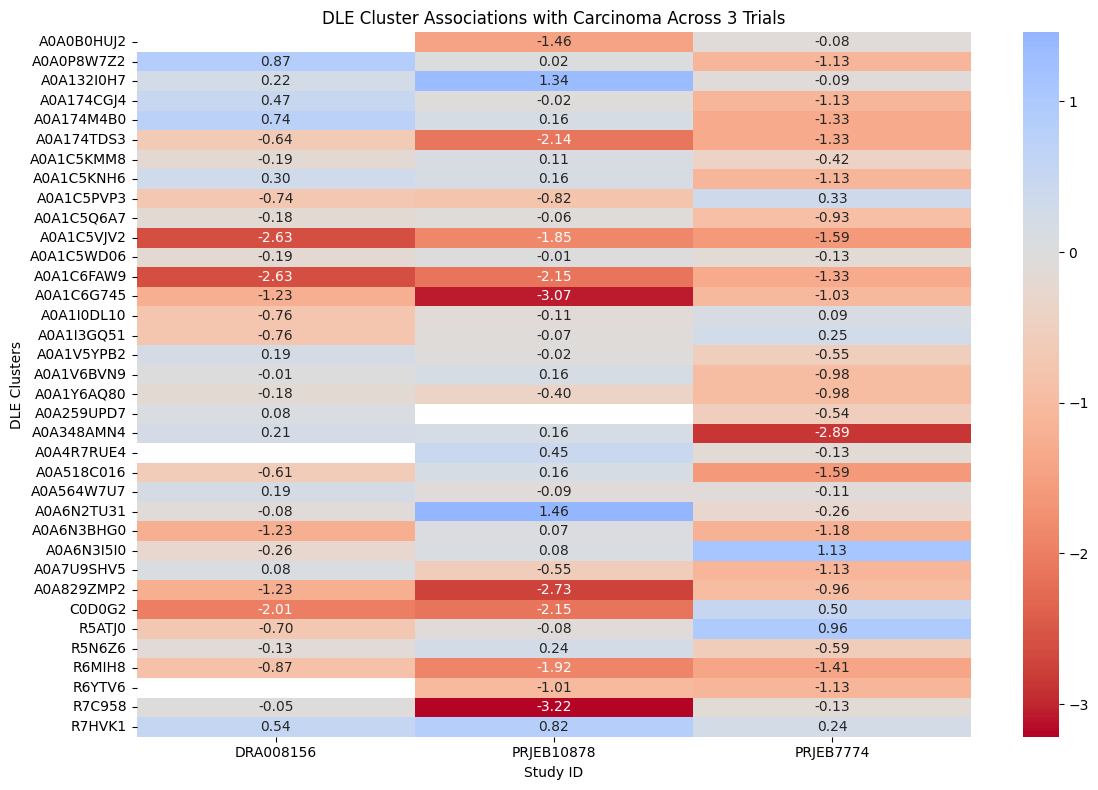

In [49]:
create_heatmap(dl_df_scaled, 'DLE Cluster Associations with Carcinoma Across 3 Trials', 'heatmap.png')

**Create single figure comparing grouped DLE abundance**

In [3]:
# Load abun data from all 3 trials

abun_DRA008156 = pd.read_feather("/Users/odesa/OneDrive - University of Toronto/CRC/LatestDataJan/DRA008156/clean_joined_genefamilies_relab_DRA008156.feather")
abun_PRJEB7774 = pd.read_feather("/Users/odesa/OneDrive - University of Toronto/CRC/LatestDataJan/PRJEB7774/clean_joined_genefamilies_relab_7774.feather")
abun_PRJEB10878 = pd.read_feather("/Users/odesa/OneDrive - University of Toronto/CRC/LatestDataJan/PRJEB10878/clean_joined_genefamilies_relab_10878.feather")

# load metadata from all 3 trials

meta_DRA008156 = pd.read_csv("/Users/odesa/OneDrive - University of Toronto/CRC/LatestDataJan/DRA008156/DRA008156_metadata_complete.tsv", sep='\t')
meta_PRJEB7774 = pd.read_csv("/Users/odesa/OneDrive - University of Toronto/CRC/LatestDataJan/PRJEB7774/PRJEB7774_metadata.tsv", sep='\t')
meta_PRJEB10878 = pd.read_csv("/Users/odesa/OneDrive - University of Toronto/CRC/LatestDataJan/PRJEB10878/PRJEB10878Metadata.txt")



In [4]:
# Clean 7774 metadata

meta_PRJEB7774 = meta_PRJEB7774[meta_PRJEB7774['sample_title'] != 'Adenoma']

In [5]:
def pool_enzyme_columns(df):

    gene_names = df.columns.str.split('_').str[0]

    result_df = df.groupby(gene_names, axis=1).sum()

    if {'SagA', 'UC118', 'DL-endopeptidase'}.issubset(result_df.columns):
        result_df['DL-endopeptidase'] = result_df['SagA'] + result_df['UC118'] + result_df['DL-endopeptidase']
        

    return result_df
    

In [ ]:
pooled_DRA008156 = pool_enzyme_columns(abun_DRA008156)

pooled_PRJEB7774 = pool_enzyme_columns(abun_PRJEB7774)

pooled_PRJEB10878 = pool_enzyme_columns(abun_PRJEB10878)


In [ ]:
display(pooled_DRA008156.head())
display(pooled_PRJEB7774.head())
display(pooled_PRJEB10878.head())

In [7]:
# Now we want to add the metadata conditions to each of the tables to seperate healthy and control

meta_PRJEB10878['config'].replace({'case': 'CRC', 'control': 'Healthy'})
meta_DRA008156['Group'].replace({'Cancer': 'CRC'})
meta_PRJEB7774['sample_title'].replace({'Carcinoma': 'CRC', 'Control': 'Healthy'})

In [8]:
print(meta_DRA008156.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Accession', 'Title', 'Alias_y',
       'Taxon ID', 'Scientific Name', 'collection_date', 'env_feature',
       'sample_name', 'Group', 'Stage', 'Age', 'Gender', 'BMI',
       'Brinkman Index', 'Alcohol', 'Tumor location'],
      dtype='object')


In [9]:
pooled_DRA008156 = pd.merge(pooled_DRA008156, meta_DRA008156, left_on = 'sample', right_on = 'Accession', how='inner')
pooled_PRJEB7774 = pd.merge(pooled_PRJEB7774, meta_PRJEB7774, left_on = 'sample', right_on = 'run_accession', how='inner')
pooled_PRJEB10878 = pd.merge(pooled_PRJEB10878, meta_PRJEB10878, left_on = 'sample', right_on = 'Run', how='inner')

In [10]:
pooled_DRA008156.rename(columns={'Group': 'condition'}, inplace=True)
pooled_PRJEB10878.rename(columns={'config': 'condition'}, inplace=True)
pooled_PRJEB7774.rename(columns={'sample_title': 'condition'}, inplace=True)

In [ ]:
pooled_PRJEB10878['condition'].replace({'case': 'CRC', 'control': 'Healthy'}, inplace=True)
pooled_DRA008156['condition'].replace({'Cancer': 'CRC'}, inplace=True)
pooled_PRJEB7774['condition'].replace({'Carcinoma': 'CRC', 'Control': 'Healthy'}, inplace=True)

In [13]:
pooled_DRA008156['Study'] = 'DRA008156'
pooled_PRJEB10878['Study'] = 'PRJEB10878'
pooled_PRJEB7774['Study'] = 'PRJEB7774'

# Combine the DataFrames
combined_df = pd.concat([pooled_DRA008156, pooled_PRJEB10878, pooled_PRJEB7774], ignore_index=True)

offset_mapping = {'Healthy': -0.2, 'CRC': 0.2}
combined_df['x_offset'] = combined_df['condition'].map(offset_mapping)

# Calculate adjusted x position for plotting
combined_df['x_position'] = combined_df.groupby(['Study', 'condition']).ngroup() + combined_df['x_offset']

combined_df['x_jittered'] = combined_df['x_position'] + np.random.normal(0, 0.05, size=len(combined_df))




/var/folders/sm/rgfxp6g94f18340p2rvqnsc00000gn/T/ipykernel_3435/255513547.py:9: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.scatterplot(data=combined_df, x='x_jittered', y='DL-endopeptidase', hue='condition', style='condition', markers=marker_styles, palette=palette, s=100)


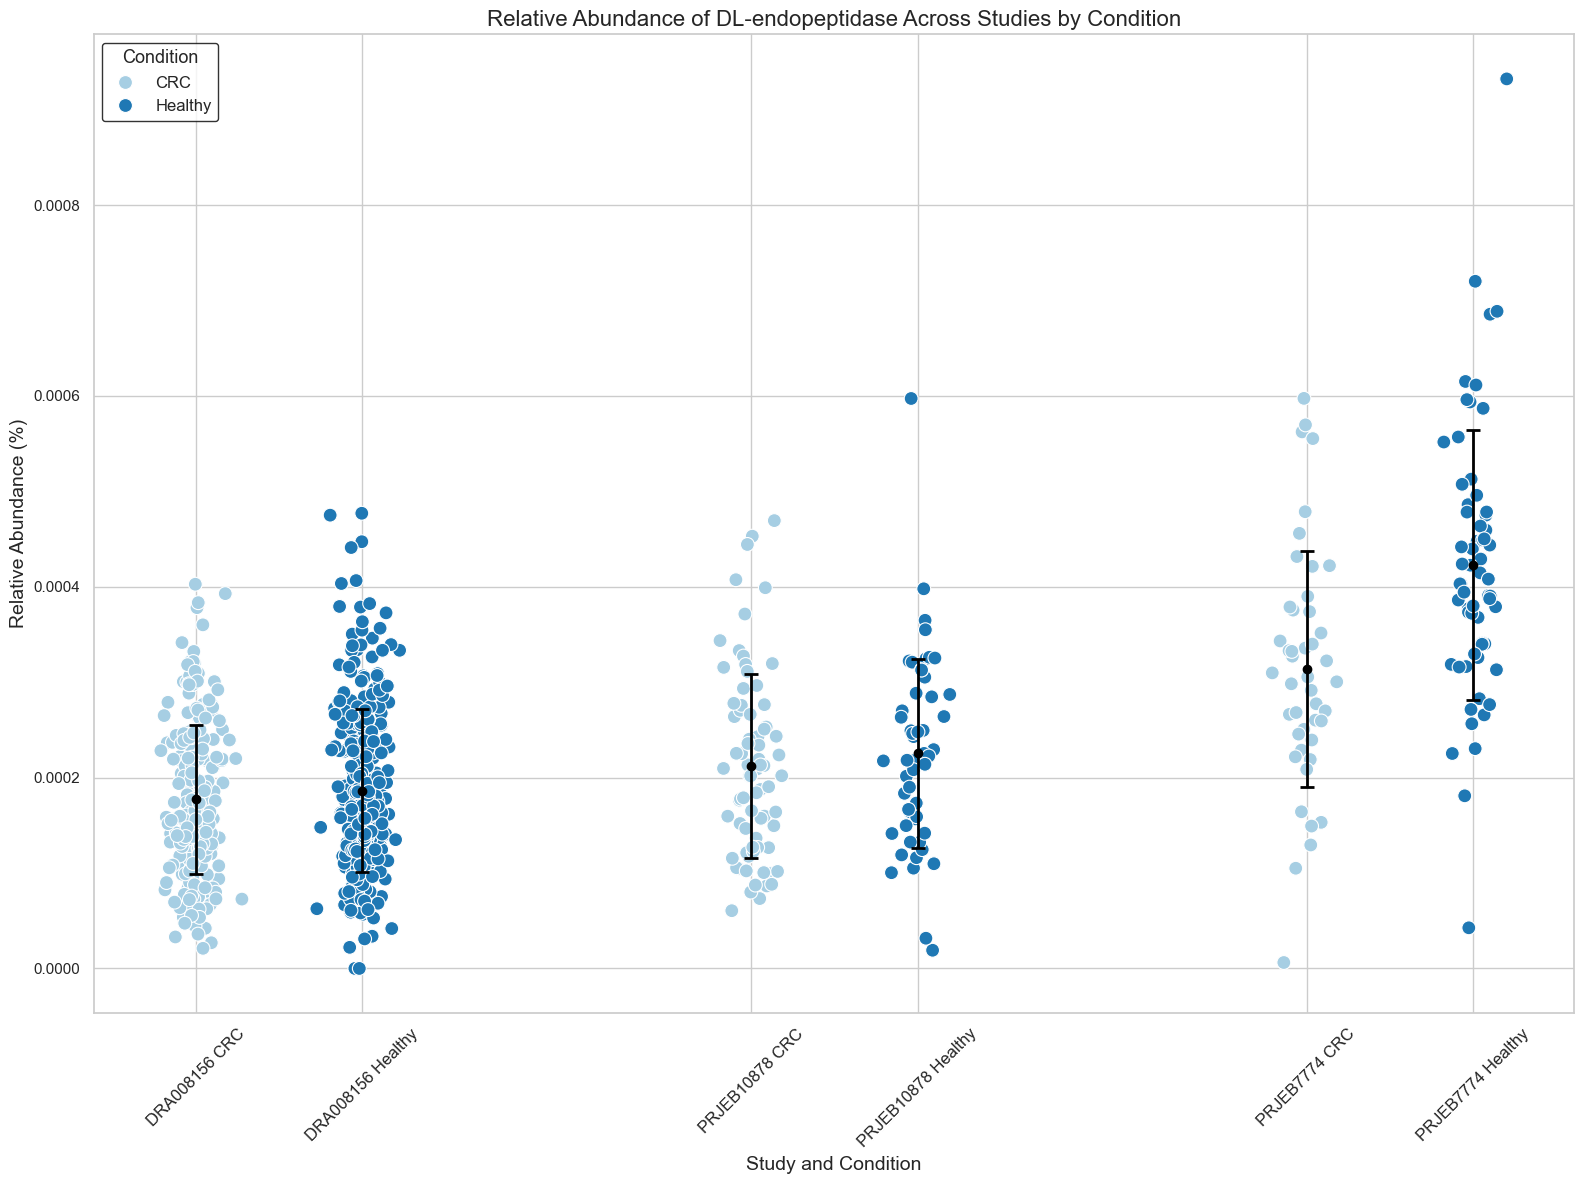

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 12))

# Create a scatter plot with error bars and means using the jittered positions
palette = sns.color_palette("Paired")
marker_styles = ['o', 'o']  # Different markers for different conditions

sns.scatterplot(data=combined_df, x='x_jittered', y='DL-endopeptidase', hue='condition', style='condition', markers=marker_styles, palette=palette, s=100)

# Plot means and error bars without jitter for clarity
means = combined_df.groupby(['Study', 'condition', 'x_position'])['DL-endopeptidase'].mean().reset_index()
errors = combined_df.groupby(['Study', 'condition', 'x_position'])['DL-endopeptidase'].std().reset_index()

for _, row in means.iterrows():
    study = row['Study']
    condition = row['condition']
    x_pos = row['x_position']
    mean = row['DL-endopeptidase']
    error = errors[(errors['Study'] == study) & (errors['condition'] == condition)]['DL-endopeptidase'].values[0]
    
    plt.errorbar(x_pos, mean, yerr=error, fmt='o', capsize=5, capthick=2, elinewidth=2, color='black')  # Consistent color for means

# Enhance the title and labels
plt.title('Relative Abundance of DL-endopeptidase Across Studies by Condition', fontsize=16)
plt.xlabel('Study and Condition', fontsize=14)
plt.ylabel('Relative Abundance (%)', fontsize=14)

# Adjust x-tick labels to show study names with conditions
x_ticks_labels = [f'{study} {condition}' for study, condition in zip(means['Study'], means['condition'])]
plt.xticks(means['x_position'].unique(), x_ticks_labels, rotation=45, fontsize=12)

# Adjust the legend
plt.legend(title='Condition', title_fontsize='13', fontsize='12', frameon=True, facecolor='white', edgecolor='black')

# Adjust the layout
plt.tight_layout()

plt.savefig('./DLE_abudnance_plot.png', dpi=600)

# Show plot
plt.show()

**ICI Visualizations**

In [12]:
metadata = pd.read_csv('/Users/odesa/OneDrive - University of Toronto/LabWork/ICI/metadata/cleaned_mdat_longitudinal.csv')


abundance = pd.read_csv('/Users/odesa/OneDrive - University of Toronto/LabWork/ICI/LatestData/clustered_complete_70966_43119.tsv', sep='\t')

In [13]:
# Filter metagenomic data to include only DL-endopeptidase columns and the sample identifier
dl_endopeptidase_columns = [col for col in abundance.columns if 'DL-endopeptidase' in col]
dl_endopeptidase_columns.append('sample_id')
filtered_metagenomic_data = abundance[dl_endopeptidase_columns]


# Extract only the accession number part from the sample_id for merging
filtered_metagenomic_data['accession'] = filtered_metagenomic_data['sample_id'].apply(lambda x: x.split('_')[0])

# Merge the metagenomic data with the clinical data on the 'accession' column
merged_data = pd.merge(metadata, filtered_metagenomic_data, on='accession', how='inner')

# print(merged_data.columns)

# Calculate mean abundance for each visit, responder status, and gene
columns_for_analysis = ['visit', 'ORR'] + [col for col in merged_data.columns if 'DL-endopeptidase' in col]
analysis_data = merged_data[columns_for_analysis]


/var/folders/sm/rgfxp6g94f18340p2rvqnsc00000gn/T/ipykernel_28585/2945116492.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metagenomic_data['accession'] = filtered_metagenomic_data['sample_id'].apply(lambda x: x.split('_')[0])


In [ ]:
# Loop through each DL-endopeptidase gene to create separate plots
for gene in [col for col in analysis_data.columns if 'DL-endopeptidase' in col]:
    # Prepare the data for plotting
    data_for_plot = analysis_data[['visit', 'ORR', gene]].copy()
    data_for_plot['Gene Abundance'] = data_for_plot[gene]
    data_for_plot.drop(columns=gene, inplace=True)

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='visit', y='Gene Abundance', hue='ORR', data=data_for_plot)
    plt.title(f'Gene Abundance Across Visits for {gene}')
    plt.xlabel('Visit')
    plt.ylabel('Mean Abundance')
    plt.legend(title='Responder Status')
    plt.show()
